#  This is Lab 1 executable file
This file contains the program code that is the solution to the tasks from the file [lab_1_task.txt](https://github.com/vandosik/M-M-MSA/blob/master/Lab_1/lab_1_task.txt).
## Authors
* Ivan Dubinin: [vandosik](https://github.com/vandosik)
* Alexey Grandilevskii: [zer0deck](https://github.com/zer0deck)
* Mikhail Sorokin: [Mikha1lSorokin](https://github.com/Mikha1lSorokin)

In [126]:
# libs initialization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp

from datetime import datetime
from scipy.optimize import curve_fit, minimize

In [127]:
# Dataset initialization
path_to_file = '../Datasets/Challenger_Ranked_Games.csv'
source_df = pd.read_csv(path_to_file, engine='python')
# source_df.head(10)
# deleting unused columns
# source_df = source_df.drop(['round_start_time', 'round_end_time', 'match_id', 'attacker_control_perecent',	'defender_control_perecent', 'team_one_name', 'team_two_name', 'control_round_name'], axis = 1)
source_df = source_df[['gameDuraton', # this is the value we will predict (target)
                        'blueWins', # this is our category sorter
                        'blueWardPlaced', # all other values are the predictors
                        'blueWardkills', 
                        'blueKills', 
                        'blueDeath', 
                        'blueChampionDamageDealt', 
                        'blueTotalGold', 
                        'blueTotalMinionKills', 
                        'blueJungleMinionKills',
                        'blueTotalHeal',
                        'blueObjectDamageDealt']]
source_df['blueChampionDamageDealt'] = source_df['blueChampionDamageDealt']/1000
source_df['blueObjectDamageDealt'] = source_df['blueObjectDamageDealt']/1000
source_df['blueTotalGold'] = source_df['blueTotalGold']/1000
source_df['blueTotalHeal'] = source_df['blueTotalHeal']/1000
source_df['blueTotalMinionKills'] = source_df['blueTotalMinionKills']
source_df['gameDuraton'] = source_df['gameDuraton']/60

# show new dataset
# source_df.head(7)

# Select column
col_names = list(source_df.columns)

# Creating list of variables for future analysis
col_names = [
        'blueChampionDamageDealt',
        'blueTotalGold', 
        'blueTotalMinionKills', 
        'blueTotalHeal', 
        # 'blueObjectDamageDealt'
]


for col_name in col_names:
    # Remove outliers
    if True: # cut by quantiles
        # Default ones
        up_quant = 0.999
        down_quant = 0.001

        if col_name == 'blueTotalGold':
            down_quant = 0.005
        elif col_name == 'blueTotalMinionKills':
            down_quant = 0.005


        q_low = source_df[col_name].quantile(down_quant)
        q_hi  = source_df[col_name].quantile(up_quant)

        source_df = source_df[(source_df[col_name] < q_hi) & (source_df[col_name] > q_low)]
    else: # cut by zscore
        source_df[(np.abs(scipy.stats.zscore(source_df)) < 3).all(axis=1)]

# show new dataset
source_df.head(7)


,gameDuraton,blueWins,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal,blueObjectDamageDealt
0,22.050000,0,38,13,15,31,56.039,37.001,440,105,31.035,5.675
1,21.950000,1,57,18,19,8,60.243,41.072,531,111,26.397,45.303
2,15.533333,0,28,7,5,20,24.014,22.929,306,64,6.567,5.651
3,34.966667,0,129,39,26,36,101.607,63.447,774,226,24.718,31.019
4,39.066667,1,114,35,27,40,134.826,74.955,831,252,37.161,95.287
5,26.116667,1,65,23,26,18,59.839,52.221,576,171,40.925,51.855
6,28.100000,0,72,26,16,31,70.270,47.107,601,136,20.503,31.788


blueChampionDamageDealt
blueTotalGold
blueTotalMinionKills
blueTotalHeal


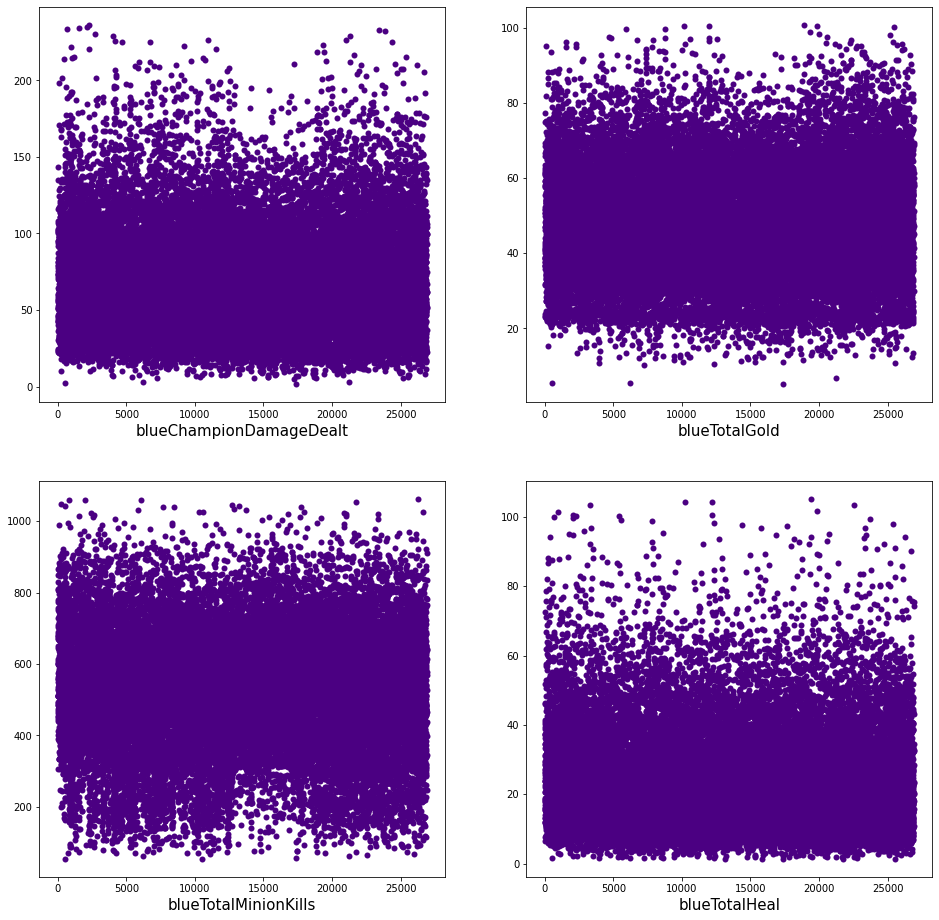

In [128]:
# Display our data
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

col_idx = 0

for i in range(2):
    for j in range(2):
        axes[i][j].scatter(source_df.index, source_df[col_names[col_idx]], c='indigo', linewidths=0.01)
        axes[i][j].set_xlabel(col_names[col_idx], fontsize = 15)
        # axes[i][j].set_ylabel('values')
        print(col_names[col_idx])
        # axes[i][j].xticks(rotation=45)
        col_idx += 1

## Exercise №2
You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

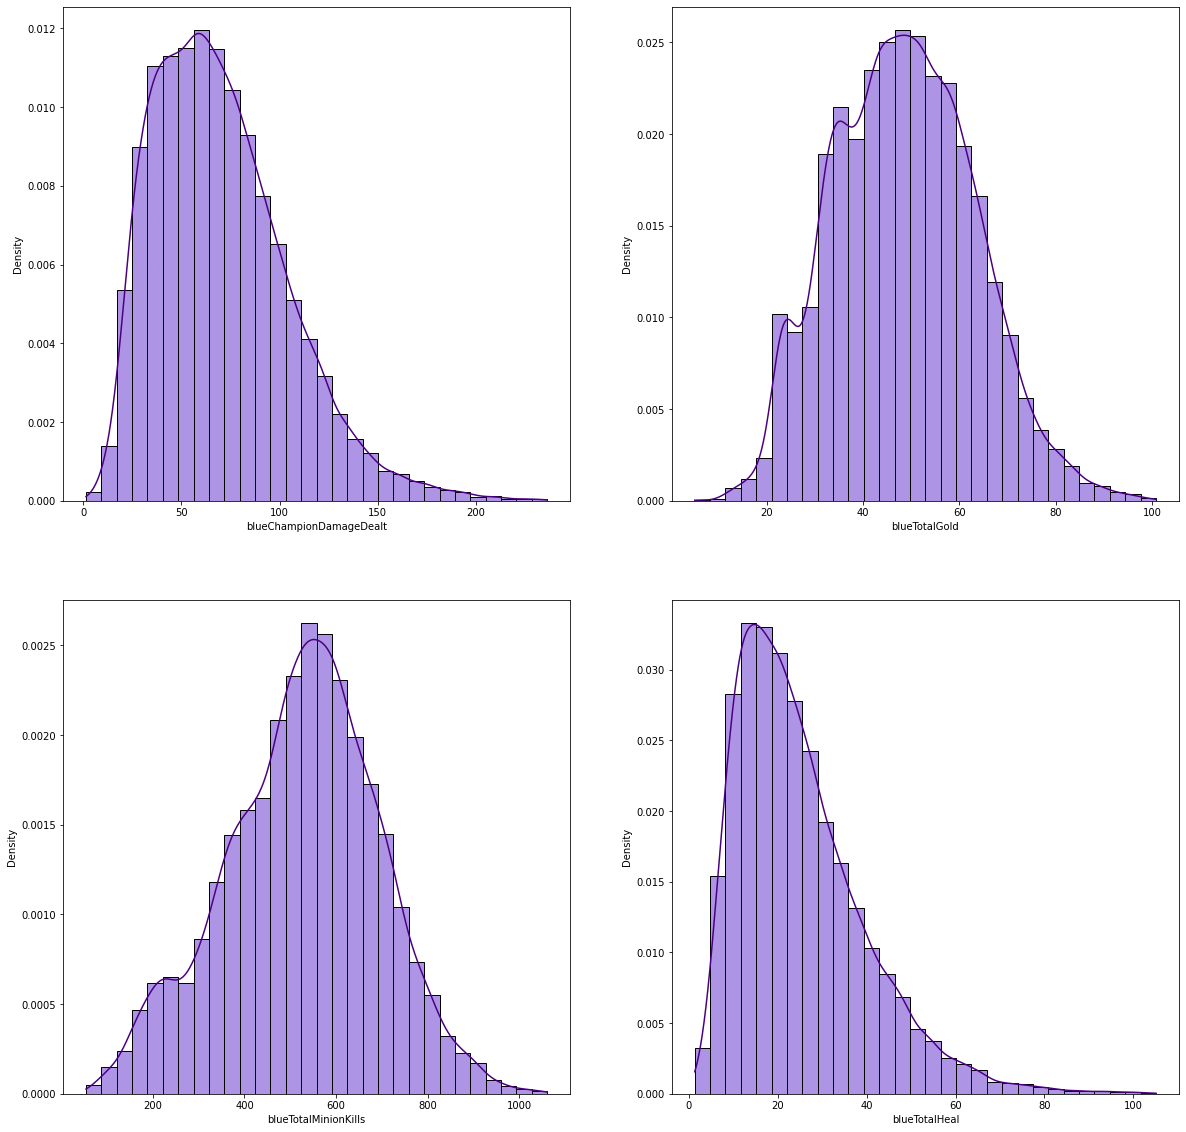

In [129]:
# Plotting a histogram and kernel density estimate
# Draw unnormed histogramm
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
col_idx = 0

for i in range(2):
    for j in range(2):
        col_name = col_names[col_idx]

        kernel = sp.stats.gaussian_kde(source_df[col_name])
        min_amount, max_amount = source_df[col_name].min(), source_df[col_name].max()
        x = np.linspace(min_amount, max_amount, len(source_df[col_name]))
        kde_values = kernel(x)
        sns.histplot(source_df[col_name], kde=False, bins=30, stat='density', ax=axes[i, j], palette='Set3', color = 'mediumpurple')
        axes[i, j].plot(x, kde_values, c = 'indigo')
        
        col_idx += 1

## Exercise №3
You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

blueChampionDamageDealt 		 mean: 70.07366307756241 median: 65.353 var: 1170.6887454414887 std: 34.21532910029492
blueTotalGold 		 mean: 48.509690392534665 median: 48.272 var: 212.2499566304128 std: 14.56880079589301
blueTotalMinionKills 		 mean: 525.625750878386 median: 536.0 var: 28098.582767424865 std: 167.62631883873388
blueTotalHeal 		 mean: 25.137725905776566 median: 22.14 var: 209.51045629713036 std: 14.47447602841396


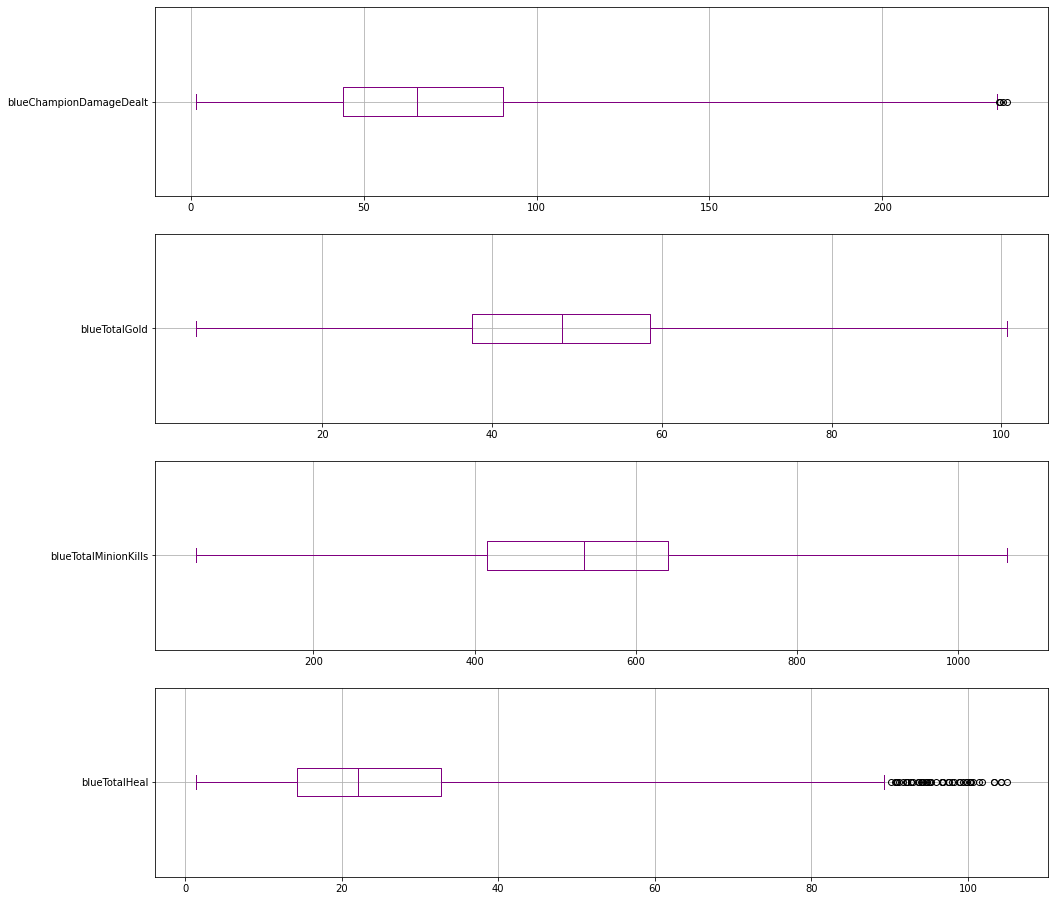

In [130]:
# Box plot
fig, axes = plt.subplots(len(col_names), figsize=(16, 16))

for col_idx in range(len(col_names)):
    # Calculation of sample mean, variance, standard deviation, median
    col_name = col_names[col_idx]
    mean = source_df[col_name].mean()
    var = source_df[col_name].var()
    std = source_df[col_name].std()
    median = source_df[col_name].median()
    
    print(col_names[col_idx] ,"\t\t", "mean:", mean, "median:", median, "var:", var, "std:", std )

    boxplot = source_df.boxplot(column=col_name, whis=3.1, vert=False, ax=axes[col_idx], color='purple')



## Exercise №4
Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results. 

------------- blueChampionDamageDealt --------------
MLE:  (0.3567127289928922, -24.95902586794658, 89.2304579717554)
LSE:  [  0.35788322 -30.34002972  95.20364279]
------------------------------------------------------
------------- blueTotalGold --------------
MLE:  (48.509690392534665, 14.568525588321872)
LSE:  [47.9842788  15.26805164]
------------------------------------------------------
------------- blueTotalMinionKills --------------
543     84
548     83
537     82
598     81
563     81
        ..
941      1
974      1
1043     1
1018     1
1061     1
Name: blueTotalMinionKills, Length: 939, dtype: int64
------------------------------------------------------
------------- blueTotalHeal --------------
MLE:  (0.4841462143044093, -4.116846783371216, 26.064832754593976)
LSE:  [ 0.54214586 -2.7222856  24.85686619]
------------------------------------------------------


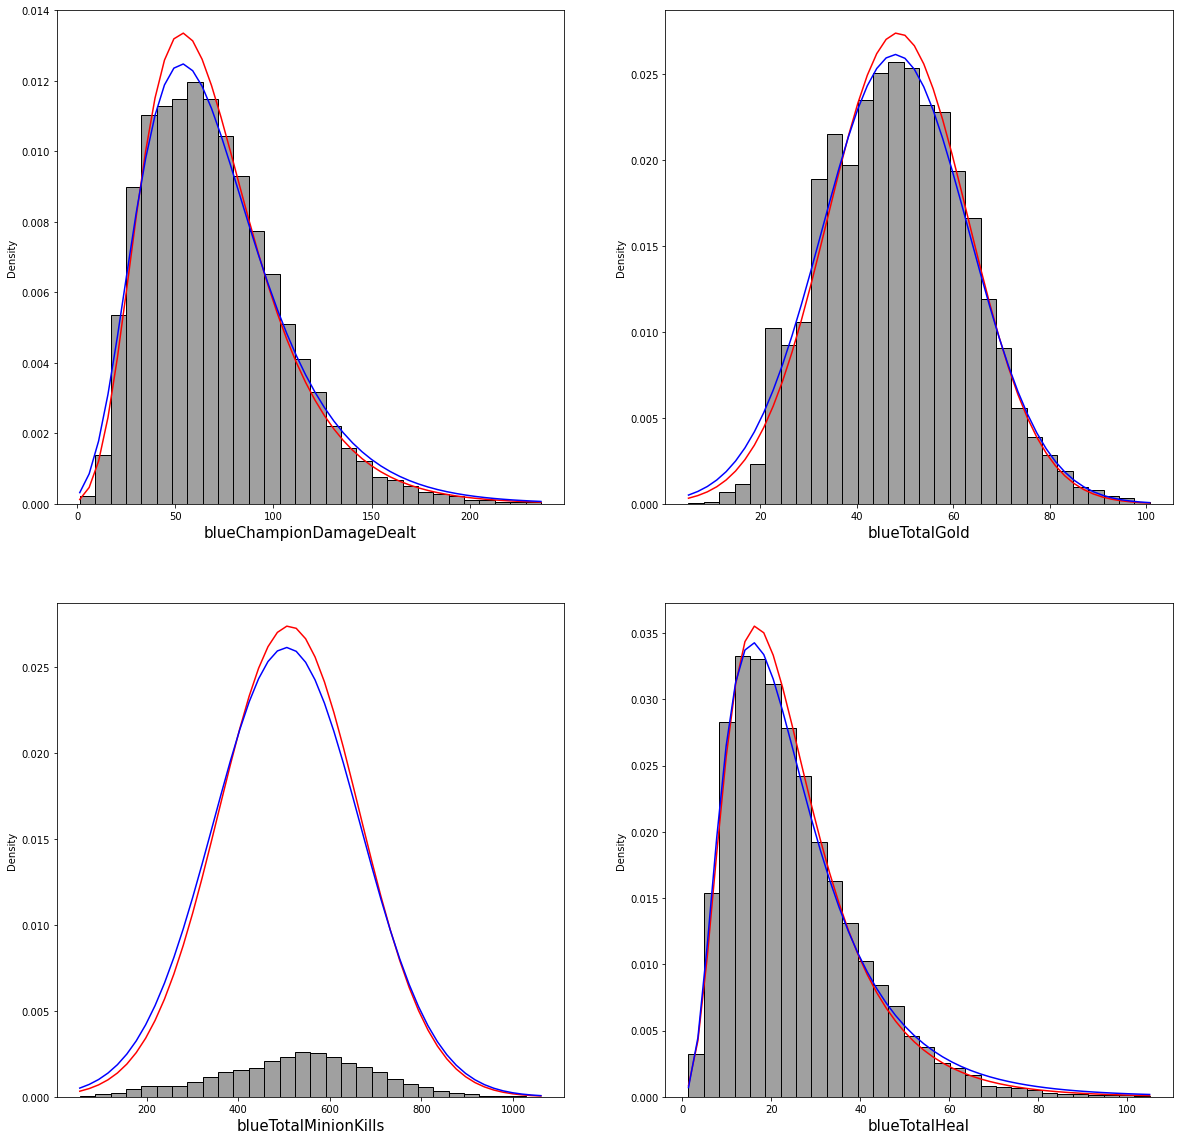

In [131]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
col_idx = 0

mle_params_list = []
lse_params_list = []

for i in range(2):
    for j in range(2):
    # Determination of the parameters of the distribution 
        col_name = col_names[col_idx]
        # Prepare data for least squares method BUG: ax (not axes) stands here not to print this hist
        hist_data = ax[i, j].hist(source_df[col_name], density=True, bins=50, color='grey') # BUG: Why is this plot not visible????
        sns.histplot(source_df[col_name], kde=False, bins=30, stat='density', ax=axes[i, j], palette='Set3', color = 'grey')
        min_amount, max_amount = source_df[col_name].min(), source_df[col_name].max()

        #  The distribution parameters are determined using the fit function based on least squares method
        # Prepare data for least squares
        hist_bins = hist_data[1][:-1]  # remove last element
        delta = hist_bins[1]-hist_bins[0]
        hist_bins += delta / 2 # Take centres of bins
        hist_vals = hist_data[0] # Get the height of bins for least squares

        x = np.linspace(min_amount, max_amount)

        print("-------------", col_name, "--------------")

        # Do MLE
        if col_name == 'blueChampionDamageDealt' or col_name == 'blueTotalHeal':
            # The lognorm distribution parameters are determined using the fit function based on the maximum likelihood method
            mle_params = sp.stats.lognorm.fit(source_df[col_name], loc=1.1, scale=1.1) # Make initial Guess
            print("MLE: ", mle_params)
            pdf_mle = sp.stats.lognorm.pdf(x, *mle_params)

        elif col_name == 'blueTotalGold':
            mle_params = sp.stats.norm.fit(source_df[col_name])
            print("MLE: ", mle_params)
            pdf_mle = sp.stats.norm.pdf(x, *mle_params)

        # elif col_name == "blueTotalMinionKills": # Binomial distribution
            # mle_params = sp.stats.binom.fit(source_df[col_name])
            # print("MLE: ", mle_params)
            # pdf_mle = sp.stats.binom.pdf(x, *mle_params)


        axes[i, j].plot(x, pdf_mle, color='r')

        # Do LSE
        if col_name == 'blueChampionDamageDealt' or col_name == 'blueTotalHeal':
            def lognorm(arg_x, s, loc, scale):
                return sp.stats.lognorm.pdf(arg_x, s, loc, scale)
            
            def lst_sqrs(par_ar, gt, x):
                s, loc, scale = par_ar
                return sum((gt - lognorm(x, s, loc, scale))**2)

            lse_params = minimize(lst_sqrs, [1.1, 1.1, 1.1], method = 'Nelder-Mead', args=(hist_vals, hist_bins), tol=0.001, options={'disp': False})
            print("LSE: ",lse_params.x)
            pdf_lsm = sp.stats.lognorm.pdf(x, *lse_params.x)

        elif col_name == 'blueTotalGold':
            def norm(arg_x, loc, scale):
                return sp.stats.norm.pdf(arg_x, loc, scale)
            
            def lst_sqrs(par_ar, gt, x):
                loc, scale = par_ar
                return sum((gt - norm(x, loc, scale))**2)

            lse_params = minimize(lst_sqrs, [10., 10.], method = 'Nelder-Mead', args=(hist_vals, hist_bins), tol=0.001, options={'disp': False})
            print("LSE: ",lse_params.x)
            pdf_lsm = sp.stats.norm.pdf(x, *lse_params.x)

        elif col_name == "blueTotalMinionKills": # Binomial distribution
            # def binom(arg_x, loc, scale):
            #     return sp.stats.binom.pmf(arg_x, loc, scale)
            
            # def lst_sqrs(par_ar, gt, x):
            #     loc, scale = par_ar
            #     return sum((gt - norm(x, loc, scale))**2)

            # lse_params = minimize(lst_sqrs, [10., 10.], method = 'Nelder-Mead', args=(hist_vals, hist_bins), tol=0.001, options={'disp': False})
            # print("LSE: ",lse_params.x)
            # pdf_lsm = sp.stats.binom.pmf(x, *lse_params.x)
            # hist_data = axes[i, j].hist(source_df[col_name], density=True, bins=len(source_df[col_name]), color='grey')
            print(source_df[col_name].value_counts())
        

        mle_params_list.append(mle_params)
        lse_params_list.append(lse_params)

        axes[i, j].plot(x, pdf_lsm, color='b')
        axes[i, j].set_xlabel(col_names[col_idx], fontsize = 15)

        col_idx += 1

        print("------------------------------------------------------")



## Exercise №5
Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

In [132]:
# Print Gained distribs by MLE and LSE



## Exercise №6
Validate your estimated parameters using QQ biplots.

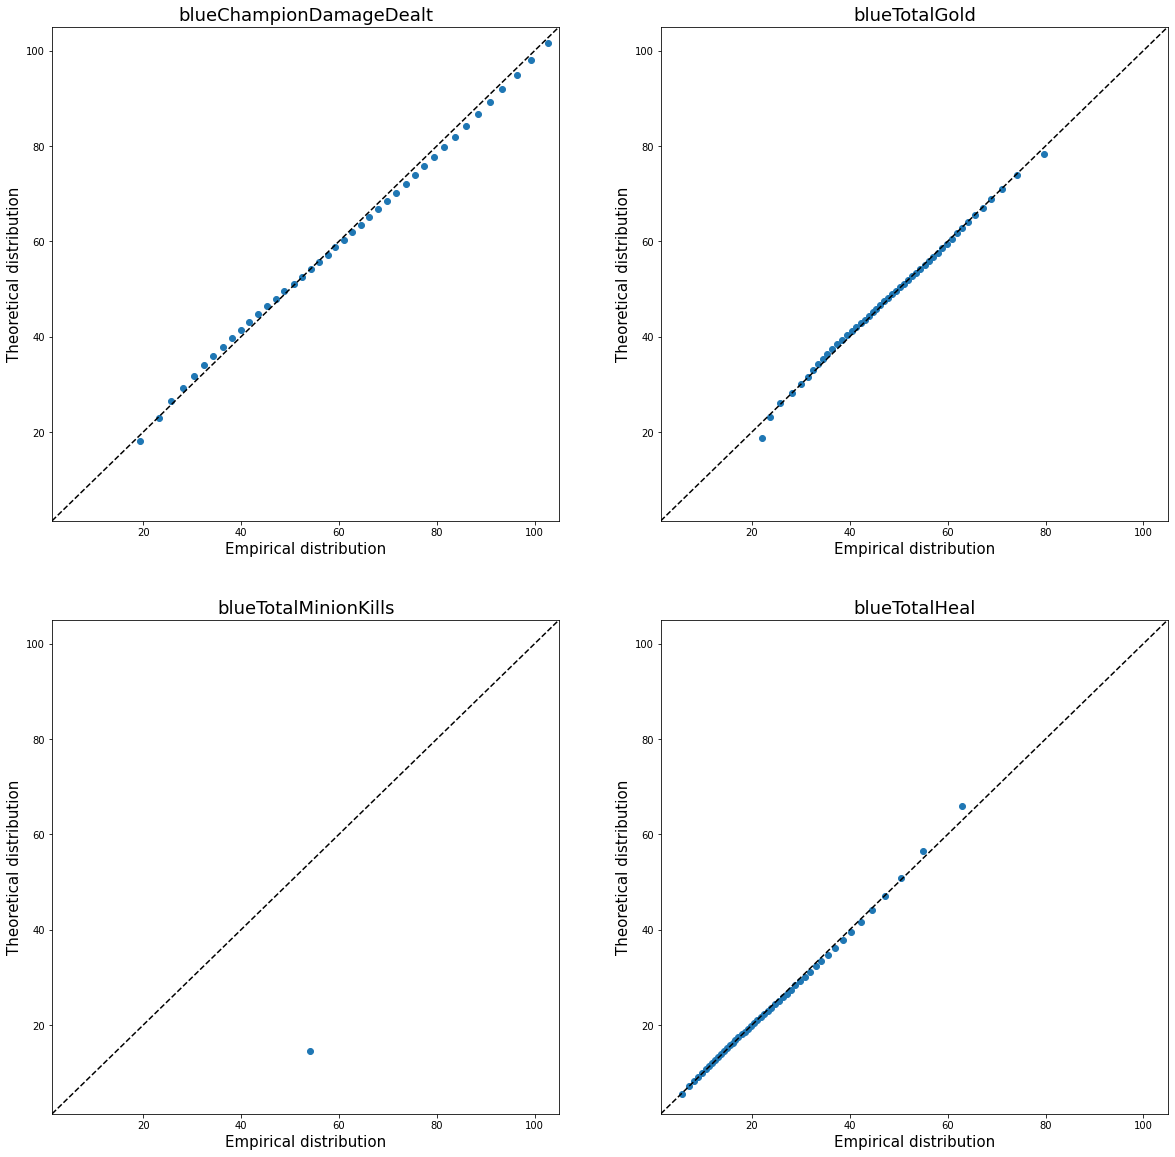

In [133]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# TODO: May be try LSA params
params_list = mle_params_list

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
col_idx = 0

# Prepare percentiles (quantiles) points
percs_num = 50
percs = np.linspace(0, 100, percs_num)

for i in range(2):
    for j in range(2):
        col_name = col_names[col_idx]
        # Calculation of quantiles
        qn_real = np.percentile(source_df[col_name], percs)

        if col_name == 'blueChampionDamageDealt' or col_name == 'blueTotalHeal':
            qn_theor = sp.stats.lognorm.ppf(percs / 100.0, *params_list[col_idx])
        elif col_name == 'blueTotalGold':
            qn_theor = sp.stats.norm.ppf(percs / 100.0, *params_list[col_idx])
        elif col_name == 'blueTotalMinionKills':
            qn_theor = sp.stats.lognorm.ppf(percs / 100.0, *params_list[col_idx])

        # Building a quantile biplot
        axes[i, j].plot(qn_real, qn_theor, ls="", marker="o", markersize=6)
        axes[i, j].plot(x, x, color="k", ls="--")
        axes[i, j].set_xlim(min_amount, max_amount)
        axes[i, j].set_ylim(min_amount, max_amount)
        axes[i, j].set_xlabel('Empirical distribution', fontsize = 15)
        axes[i, j].set_ylabel('Theoretical distribution', fontsize = 15)
        axes[i, j].set_title(col_names[col_idx], fontsize = 18)

        col_idx += 1


plt.show()

## Exercise №7
Estimate  correctness of fitted distributions using at least 2 statistical tests.

In [134]:
# Calculation of the Kolmogorov-Smirnov test, Cramér-von Mises test  and chi-square (Pirson test?)
# TODO: May be try LSA params
params_list = mle_params_list

for col_idx in range(len(col_names)):
    
    col_name = col_names[col_idx]
    print("------------------------------", col_name, "--------------------------------")

    if col_name == 'blueChampionDamageDealt' or col_name == 'blueTotalHeal':
        ks = sp.stats.kstest(source_df[col_name], 'lognorm', params_list[col_idx], N=100)
        cvm = sp.stats.cramervonmises(source_df[col_name], 'lognorm', mle_params_list[col_idx])
        # chi2 = scipy.stats.chisquare(source_df[col_name])

    elif col_name == 'blueTotalGold':
        ks = sp.stats.kstest(source_df[col_name], 'norm', params_list[col_idx], N=100)
        cvm = sp.stats.cramervonmises(source_df[col_name], 'norm', mle_params_list[col_idx])
        # chi2 = scipy.stats.chisquare(source_df[col_name])

    elif col_name == 'NONE': 
        ks = sp.stats.kstest(source_df[col_name], 'lognorm', params_list[col_idx], N=100)
        cvm = sp.stats.cramervonmises(source_df[col_name], 'lognorm', mle_params_list[col_idx])
        # chi2 = sp.stats.chisquare(source_df[col_name])
    print("--------------------------------------------------------------------------------")

    print(ks)
    print(cvm)
    # print(chi2)


------------------------------ blueChampionDamageDealt --------------------------------
--------------------------------------------------------------------------------
KstestResult(statistic=0.019065813885845606, pvalue=8.663046695697203e-09)
CramerVonMisesResult(statistic=3.814223343453177, pvalue=1.3001675291945958e-09)
------------------------------ blueTotalGold --------------------------------
--------------------------------------------------------------------------------
KstestResult(statistic=0.023861215008886327, pvalue=1.5946110597403575e-13)
CramerVonMisesResult(statistic=2.7841489552350547, pvalue=2.2736460281169713e-07)
------------------------------ blueTotalMinionKills --------------------------------
--------------------------------------------------------------------------------
KstestResult(statistic=0.023861215008886327, pvalue=1.5946110597403575e-13)
CramerVonMisesResult(statistic=2.7841489552350547, pvalue=2.2736460281169713e-07)
------------------------------ blu